In [1]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.linalg import expm, sinm, cosm, logm, sqrtm

Cuda is not available!
logicqubit version 1.5.8


In [2]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [110]:
D = np.matrix('0.75 0; 0 2.4')
P = np.matrix('1 0; 0 1')/sqrt(2)

H = P*D*P.I
H_ad = H.getH()

U = np.matrix(expm(1j*H)).tolist()
print(U)

[[(0.7316888688738209+0.6816387600233341j), 0j], [0j, (-0.7373937155412454+0.675463180551151j)]]


In [111]:
H=-1j*logm(U)
print(H)

[[0.75+2.23984107e-17j 0.  +0.00000000e+00j]
 [0.  -0.00000000e+00j 2.4 +2.31890336e-17j]]


In [112]:
logicQuBit  = LogicQuBit(5)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

y.X()
y.H()

y.CU(x4, U)

y.CU(x3, U)
y.CU(x3, U)

y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)
y.CU(x2, U)

y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)
y.CU(x1, U)

iqft([x1,x2,x3,x4])

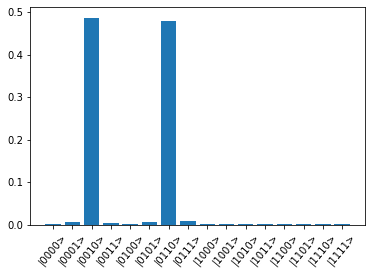

[(0.001401639196163007+0j), (0.0051524981260398645+0j), (0.4872683702867632+0j), (0.004079034518051573+0j), (0.0023766157306936786+0j), (0.005379266264092826+0j), (0.48023502593394907+0j), (0.007857372483188886+0j), (0.0019293485609914271+0j), (0.000955085534128087+0j), (0.0006340302893651549+0j), (0.000502806144298423+0j), (0.0004561505625200024+0j), (0.0004674769254270446+0j), (0.000546477776361717+0j), (0.00075880166796409+0j)]


In [113]:
res = logicQuBit.Measure([x1,x2,x3,x4])
logicQuBit.Plot()
print(res)

In [114]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

size=4
blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.3] 
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
print(results)

[0.7853981633974483, 2.356194490192345]


In [115]:
# todos possíveis valores
size = 4
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.39269908169872414,
 0.7853981633974483,
 1.1780972450961724,
 1.5707963267948966,
 1.9634954084936207,
 2.356194490192345,
 2.748893571891069,
 3.141592653589793,
 3.5342917352885173,
 3.9269908169872414,
 4.319689898685965,
 4.71238898038469,
 5.105088062083414,
 5.497787143782138,
 5.890486225480862]